In [125]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [57]:
ratings = np.loadtxt("musicRatings (1).csv", delimiter=",")
ratings = ratings[:, :-1]
full_ratings = np.loadtxt("full_ratings.csv", delimiter=",")
full_ratings = full_ratings[:, :-1]

In [58]:
count_nan = np.isnan(ratings).sum()
count_all = ratings.shape[0] * ratings.shape[1]
count_nonnan = count_all - count_nan
ratio320 = 320 * 944 / count_nonnan

In [74]:
def getVIFs(data):
    res = []
    
    for i in range(data.shape[1]):
        X = np.concatenate([data[:, :i], data[:, i+1:]], axis=1)
        y = data[:, i]
        reg = LinearRegression().fit(X, y)
        res.append(1/(1 - reg.score(X, y)))
        
    return list(enumerate(res))

In [93]:
lis320 = getVIFs(full_ratings[:, :320])
list320_sorted = sorted(lis320, key=lambda x:x[1])
list320_sorted = list320_sorted[:int(ratio320*169)]

In [96]:
list320_sorted

[(300, 2.137414903738411),
 (315, 2.407087646330532),
 (12, 2.504890990855245),
 (203, 2.5325030214767574),
 (279, 2.541269625269313),
 (313, 2.554162108760314),
 (301, 2.5852467670442727),
 (192, 2.5957811508533717),
 (122, 2.6023222582672947),
 (225, 2.647225569976174),
 (223, 2.6592305951713757),
 (125, 2.6926121438289723),
 (116, 2.7029248762993867),
 (314, 2.720282922436673),
 (312, 2.7210256370182697),
 (304, 2.7307188226213173),
 (176, 2.7360322769464207),
 (208, 2.756833972023675),
 (185, 2.761715795939601),
 (228, 2.776181234314311),
 (293, 2.7908487704361424),
 (258, 2.792447071924747),
 (209, 2.8081772964685157),
 (191, 2.8090105900499553),
 (272, 2.8117818486567434),
 (7, 2.827843305618178),
 (90, 2.8279056767116586),
 (311, 2.8506272650491087),
 (96, 2.855978043978253),
 (88, 2.861942755884301),
 (282, 2.8750220060525296),
 (79, 2.892951740511448),
 (180, 2.8932639491138774),
 (175, 2.8962038367998244),
 (82, 2.9139133275364353),
 (52, 2.918441335272713),
 (77, 2.921622304

In [94]:
lis679 = getVIFs(full_ratings[:, 320:])
list679_sorted = sorted(lis679, key=lambda x:x[1])
list679_sorted = list679_sorted[:169 - int(ratio320*169)]
list679_sorted = [(i[0]+320, i[1]) for i in list679_sorted]

In [95]:
list679_sorted

[(624, 15.012077092179759),
 (323, 15.379115556515647),
 (887, 15.688302567348838),
 (722, 15.808868865956544),
 (826, 15.94033957976761),
 (590, 16.927564402107837),
 (451, 18.16467084986153),
 (582, 18.216516055475367),
 (613, 18.24896549197059),
 (397, 18.38431360171543),
 (989, 18.58875353800096),
 (955, 18.907884661884843),
 (531, 18.996471673215698),
 (765, 19.207554656050057),
 (486, 19.238664703055978),
 (427, 19.604729913794134),
 (391, 19.734757315131244),
 (959, 19.892391484860315),
 (716, 19.964382631210523),
 (640, 20.12524033681858),
 (723, 20.286139658244664),
 (421, 20.324666166297842),
 (525, 20.41866355214999),
 (825, 20.502892575953442),
 (681, 20.538145974287744),
 (550, 20.600387237941522),
 (494, 20.720104918427097),
 (570, 20.75750449265707),
 (836, 20.81386315347874),
 (495, 20.9851672484255)]

In [3]:
music_lib = pd.read_excel('MusicTable.xlsx').iloc[:, :8]
music_lib.replace(' ', np.nan, inplace=True)
music_lib = music_lib.dropna()
source_lib = pd.read_excel('MusicTable.xlsx').iloc[:6, [8]]
genre_lib = pd.read_excel('MusicTable.xlsx').iloc[:9, [9]]

NameError: name 'pd' is not defined

In [ ]:
select320 = music_lib.iloc[[i[0] for i in list320_sorted]]
select679 = music_lib.iloc[[i[0] for i in list679_sorted]]

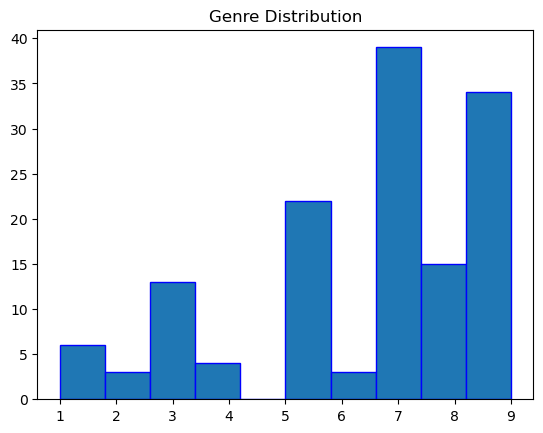

                           Genre.1
0   1 = Classical/Opera/Soundtrack
1                 2 = Country/Folk
2             3 = Electronic/Dance
3                   4 = Jazz/Vocal
4               5 = Pop/Mainstream
5                   6 = Rap/Hiphop
6  7 = Rock/Alternative/Metal/Punk
7          8 = R&B/Soul/Funk/Disco
8          9 = World/International


In [155]:
plt.hist(select320["Genre"].astype(int), bins = 10, ec = "b")
plt.title("Genre Distribution")
plt.show()
print(genre_lib)

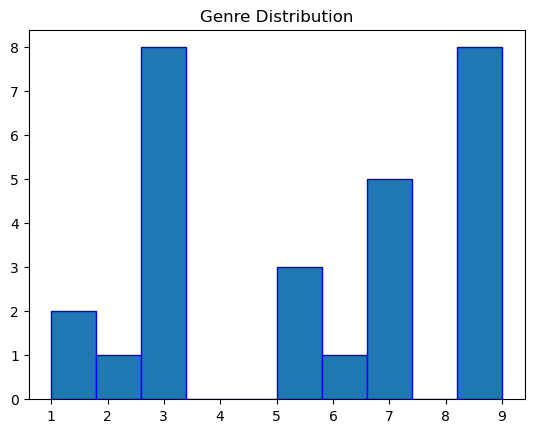

                           Genre.1
0   1 = Classical/Opera/Soundtrack
1                 2 = Country/Folk
2             3 = Electronic/Dance
3                   4 = Jazz/Vocal
4               5 = Pop/Mainstream
5                   6 = Rap/Hiphop
6  7 = Rock/Alternative/Metal/Punk
7          8 = R&B/Soul/Funk/Disco
8          9 = World/International


In [156]:
plt.hist(select679.dropna()["Genre"].astype(int), bins = 10, ec = "b")
plt.title("Genre Distribution")
plt.show()
print(genre_lib)

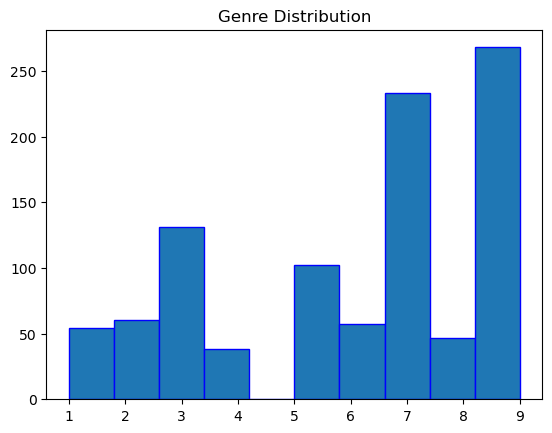

                           Genre.1
0   1 = Classical/Opera/Soundtrack
1                 2 = Country/Folk
2             3 = Electronic/Dance
3                   4 = Jazz/Vocal
4               5 = Pop/Mainstream
5                   6 = Rap/Hiphop
6  7 = Rock/Alternative/Metal/Punk
7          8 = R&B/Soul/Funk/Disco
8          9 = World/International


In [158]:
plt.hist(music_lib.dropna()["Genre"].astype(int), bins = 10, ec = "b")
plt.title("Genre Distribution")
plt.show()
print(genre_lib)

In [159]:
select320.to_csv('select320.csv')
select679.to_csv('select679.csv')